In [1]:
import pandas as pd

DATA_PATH: str = "data/4ch"

uselog = pd.read_csv(f"{DATA_PATH}/use_log.csv")
customer = pd.read_csv(f"{DATA_PATH}/customer_join.csv")

In [2]:
uselog

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01
...,...,...,...
197423,L00000049209753,TS977703,2019-03-31
197424,L00000049209754,TS979550,2019-03-31
197425,L00000049209755,TS995299,2019-03-31
197426,L00000049209756,TS995853,2019-03-31


In [3]:
customer

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반,8.000000,8.0,8,8,0,2019-04-30,1
4188,HD246549,XXXXX,C01,F,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반,10.000000,10.0,10,10,0,2019-04-30,1
4189,GD037007,XXXXX,C03,M,2019-03-14,NaN,CA1,0,2_야간,6000,2_일반,8.000000,8.0,8,8,0,2019-04-30,1
4190,OA953150,XXXXX,C01,M,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반,11.000000,11.0,11,11,0,2019-04-30,1


In [4]:
uselog.isnull().sum()

log_id         0
customer_id    0
usedate        0
dtype: int64

In [5]:
customer.isnull().sum()

customer_id             0
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
dtype: int64

### Predict Customer's Action

- read use log and predict visit times next month
- assume that today is 2019.04.xx

### I. Clustering (Grouping Customer)

k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster.

In [6]:
# get statistic values of visit time on a month: mean, median, min, max
# and maintained period for membership.
customer_clustering = customer[["mean", "median", "min", "max", "membership_period"]]

# will be clustering with K-means

In [7]:
# import k-means package from sklean
# and StandardScaler for preprocessing: there are different value range in each columns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Preprocessing
# creating preprocessing class instance
sc = StandardScaler()

# convert ranges in each column in customer_clustering in same range
customer_clustering_sc = sc.fit_transform(customer_clustering)

# creating analysis class instance(with 4 grouping(cluster) and 0 random_state)
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit(customer_clustering_sc)

# all data in customer_clustering_sc has one of cluster number range(0, 4)
print(set(clusters.labels_))

# {0, 1, 2, 3}

{0, 1, 2, 3}


In [8]:
# add cluster name in each row in customer_clustering DataFrame
customer_clustering["cluster"] = clusters.labels_
customer_clustering

/tmp/ipykernel_5968/1795993850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_clustering["cluster"] = clusters.labels_


,mean,median,min,max,membership_period,cluster
0,4.833333,5.0,2,8,47,2
1,5.083333,5.0,3,7,47,2
2,4.583333,5.0,3,6,47,2
3,4.833333,4.5,2,7,47,2
4,3.916667,4.0,1,6,47,2
...,...,...,...,...,...,...
4187,8.000000,8.0,8,8,1,3
4188,10.000000,10.0,10,10,1,3
4189,8.000000,8.0,8,8,1,3
4190,11.000000,11.0,11,11,1,3


### II. Change Column Name and Analysis Data

In [9]:
# change column name
customer_clustering.columns = ["mean_mon", "median_mon", "min_mon", "max_mon", "member_period", "cluster"]

# groupby with cluster and check the number of data in each cluster
customer_clustering.groupby("cluster").count()

,mean_mon,median_mon,min_mon,max_mon,member_period
cluster,,,,,
0,1334,1334,1334,1334,1334
1,771,771,771,771,771
2,1249,1249,1249,1249,1249
3,838,838,838,838,838


In [10]:
# check the mean for each cluster
customer_clustering.groupby("cluster").mean()

,mean_mon,median_mon,min_mon,max_mon,member_period
cluster,,,,,
0,5.541974,5.392804,2.704648,8.757871,14.857571
1,3.065504,2.900130,1.649805,4.783398,9.276265
2,4.677561,4.670937,2.153723,7.233787,36.915933
3,8.064079,8.050716,6.180191,10.014320,7.016706


##### Analysis I
- cluster group 2: has the longest membership_period. and visit time is the second lowest.
- Cluster group 3: visit time in this group is much bigger than that of the other groups, but the member_period is the shortest.

##### Hypothesis
- member who visit the center 4 ~ 5 times a month tend to stay their membership longer than the others.

### III. Visualization(dimension_reduction)

- dimension_reduction : One of non supervisor learning
- Principal component analysis (PCA) is a statistical technique that summarizes large data sets into a smaller set of components.
- customer_clustering_sc has a 5 columns and it will be decomposited into 2 dimension for visualization.

In [11]:
# import PCA(Principal Component Analysis)
from sklearn.decomposition import PCA

# store Standard Scaled data
X = customer_clustering_sc

# create PCA class instance with 2 dimensions
pca = PCA(n_components=2)

# transform cluster_sc into PCA
pca.fit(X)
x_pca = pca.transform(X)

# transform x_pca to dataframe
pca_df = pd.DataFrame(x_pca)

# add cluster name
pca_df["cluster"] = customer_clustering["cluster"]

In [12]:
pca_df

,0,1,cluster
0,-0.819982,1.959097,2
1,-0.707922,1.799857,2
2,-1.061499,1.659826,2
3,-1.160764,1.810139,2
4,-2.017132,1.670101,2
...,...,...,...
4187,3.027933,-1.139635,3
4188,5.064720,-0.769684,3
4189,3.027933,-1.139635,3
4190,6.083114,-0.584708,3


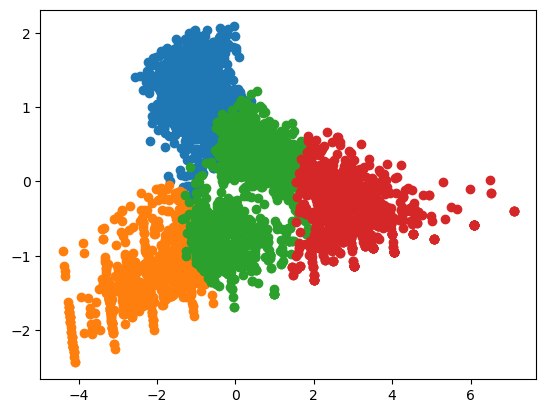

In [13]:
# import matplotlib.pyplot for visualization
import matplotlib.pyplot as plt

# draw graph: just verify the data was divided well.
for i in customer_clustering["cluster"].unique():
    # DataFrame for each cluster number
    tmp = pca_df.loc[pca_df["cluster"] == i ]

    # draw dot for each row.
    plt.scatter(tmp[0], tmp[1])

### IV. Analysis with Clustering

In [14]:
customer

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반,8.000000,8.0,8,8,0,2019-04-30,1
4188,HD246549,XXXXX,C01,F,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반,10.000000,10.0,10,10,0,2019-04-30,1
4189,GD037007,XXXXX,C03,M,2019-03-14,NaN,CA1,0,2_야간,6000,2_일반,8.000000,8.0,8,8,0,2019-04-30,1
4190,OA953150,XXXXX,C01,M,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반,11.000000,11.0,11,11,0,2019-04-30,1


In [15]:
customer_clustering

,mean_mon,median_mon,min_mon,max_mon,member_period,cluster
0,4.833333,5.0,2,8,47,2
1,5.083333,5.0,3,7,47,2
2,4.583333,5.0,3,6,47,2
3,4.833333,4.5,2,7,47,2
4,3.916667,4.0,1,6,47,2
...,...,...,...,...,...,...
4187,8.000000,8.0,8,8,1,3
4188,10.000000,10.0,10,10,1,3
4189,8.000000,8.0,8,8,1,3
4190,11.000000,11.0,11,11,1,3


In [16]:
# Need to use 'is_deleted' column in customer_clustering
new_customer_df = customer
new_customer_df["cluster"] = customer_clustering["cluster"]
new_customer_df

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period,cluster
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47,2
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47,2
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47,2
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47,2
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반,8.000000,8.0,8,8,0,2019-04-30,1,3
4188,HD246549,XXXXX,C01,F,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반,10.000000,10.0,10,10,0,2019-04-30,1,3
4189,GD037007,XXXXX,C03,M,2019-03-14,NaN,CA1,0,2_야간,6000,2_일반,8.000000,8.0,8,8,0,2019-04-30,1,3
4190,OA953150,XXXXX,C01,M,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반,11.000000,11.0,11,11,0,2019-04-30,1,3


In [17]:
# groupby with cluster and is_deleted
new_customer_df.groupby(["cluster", "is_deleted"], as_index=False).count()[["cluster", "is_deleted", "customer_id"]]

,cluster,is_deleted,customer_id
0,0,0,791
1,0,1,543
2,1,1,771
3,2,0,1231
4,2,1,18
5,3,0,820
6,3,1,18


#### Analysis
- all clusters except cluster #1 have more staying members than quit members.
- cluster #1 has only quit member.

In [18]:
# groupby with cluster and routine_flg
new_customer_df.groupby(["cluster", "routine_flg"], as_index=False).count()[["cluster", "routine_flg", "customer_id"]]

,cluster,routine_flg,customer_id
0,0,0,227
1,0,1,1107
2,1,0,499
3,1,1,272
4,2,0,2
5,2,1,1247
6,3,0,51
7,3,1,787


#### Analysis
- all clusters has a regular and irregular visiting members.
- all clusters except cluster #1 have more regular visitors than irregular visitors
- cluster #1 has more irregular visitors than regular visitors.

=> Hypothesis: Irregular visitors tend to quit more than regular visitors.

#### V. Predict Member's Action(how much times will the members visit next month?)

-  predict the members action with data of last 6 months. => Supervised Learning.

In [19]:
uselog

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01
...,...,...,...
197423,L00000049209753,TS977703,2019-03-31
197424,L00000049209754,TS979550,2019-03-31
197425,L00000049209755,TS995299,2019-03-31
197426,L00000049209756,TS995853,2019-03-31


In [20]:
uselog["usedate"] = pd.to_datetime(uselog["usedate"])
uselog["ym"] = uselog["usedate"].dt.strftime("%Y%m")

uselog_month = uselog.groupby(["ym", "customer_id"], as_index=False).count()
uselog_month

,ym,customer_id,log_id,usedate
0,201804,AS002855,4,4
1,201804,AS009013,2,2
2,201804,AS009373,3,3
3,201804,AS015315,6,6
4,201804,AS015739,7,7
...,...,...,...,...
36837,201903,TS995853,8,8
36838,201903,TS998593,8,8
36839,201903,TS999079,3,3
36840,201903,TS999231,6,6


In [21]:
# delete unnecessary column and rename column to 'count'
# del uselog_month["usedate"]
uselog_month.rename(columns={"log_id": "count"}, inplace=True)
uselog_month

,ym,customer_id,count,usedate
0,201804,AS002855,4,4
1,201804,AS009013,2,2
2,201804,AS009373,3,3
3,201804,AS015315,6,6
4,201804,AS015739,7,7
...,...,...,...,...
36837,201903,TS995853,8,8
36838,201903,TS998593,8,8
36839,201903,TS999079,3,3
36840,201903,TS999231,6,6


In [22]:
uselog["ym"].unique()

array(['201804', '201805', '201806', '201807', '201808', '201809',
       '201810', '201811', '201812', '201901', '201902', '201903'],
      dtype=object)

In [23]:
year_month = list(uselog["ym"].unique())
predict_df = pd.DataFrame()

for i in range(6, len(year_month)):
    tmp = uselog_month.loc[uselog_month["ym"] == year_month[i]]

    for j in range(1, 7):
        tmp_before = uselog_month.loc[ uselog_month["ym"] == year_month[i-j] ]
        tmp_before.rename(columns={"count": "month_ago_{}".format(j)}, inplace=True)
        del tmp_before["ym"]
        del tmp_before["usedate"]
        tmp = pd.merge(tmp, tmp_before, on="customer_id", how="left")

    predict_df = pd.concat([predict_df, tmp], ignore_index=True)    

/tmp/ipykernel_5968/1632954122.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_before.rename(columns={"count": "month_ago_{}".format(j)}, inplace=True)
/tmp/ipykernel_5968/1632954122.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_before.rename(columns={"count": "month_ago_{}".format(j)}, inplace=True)
/tmp/ipykernel_5968/1632954122.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_before.rename(columns={"count": 

In [24]:
# customer's visit info for 6 months at specific year_month
predict_df

,ym,customer_id,count,usedate,month_ago_1,month_ago_2,month_ago_3,month_ago_4,month_ago_5,month_ago_6
0,201810,AS002855,3,3,7.0,3.0,5.0,5.0,5.0,4.0
1,201810,AS008805,2,2,2.0,5.0,7.0,8.0,NaN,NaN
2,201810,AS009373,5,5,6.0,6.0,7.0,4.0,4.0,3.0
3,201810,AS015233,7,7,9.0,11.0,5.0,7.0,7.0,NaN
4,201810,AS015315,4,4,7.0,3.0,6.0,3.0,3.0,6.0
...,...,...,...,...,...,...,...,...,...,...
18305,201903,TS995853,8,8,11.0,NaN,NaN,NaN,NaN,NaN
18306,201903,TS998593,8,8,7.0,8.0,7.0,9.0,9.0,9.0
18307,201903,TS999079,3,3,2.0,6.0,9.0,6.0,6.0,4.0
18308,201903,TS999231,6,6,6.0,3.0,8.0,5.0,5.0,4.0


In [25]:
# filter members who maintain its membership over 6 month
predict_df = predict_df.dropna().reset_index(drop=True)
predict_df

,ym,customer_id,count,usedate,month_ago_1,month_ago_2,month_ago_3,month_ago_4,month_ago_5,month_ago_6
0,201810,AS002855,3,3,7.0,3.0,5.0,5.0,5.0,4.0
1,201810,AS009373,5,5,6.0,6.0,7.0,4.0,4.0,3.0
2,201810,AS015315,4,4,7.0,3.0,6.0,3.0,3.0,6.0
3,201810,AS015739,5,5,6.0,5.0,8.0,6.0,5.0,7.0
4,201810,AS019860,7,7,5.0,7.0,4.0,6.0,8.0,6.0
...,...,...,...,...,...,...,...,...,...,...
15108,201903,TS995299,3,3,3.0,5.0,4.0,5.0,4.0,5.0
15109,201903,TS998593,8,8,7.0,8.0,7.0,9.0,9.0,9.0
15110,201903,TS999079,3,3,2.0,6.0,9.0,6.0,6.0,4.0
15111,201903,TS999231,6,6,6.0,3.0,8.0,5.0,5.0,4.0


#### Add Variables to Predict

- predict_df is a Time Series data
- so, it is better to insert membership period for each customer into predict_df
  => 1. add start_date
  => 2. calculate delta months between start_date and ym date

In [26]:
predict_df = pd.merge(predict_df, customer[["customer_id", "start_date"]], on="customer_id", how="left")
predict_df

,ym,customer_id,count,usedate,month_ago_1,month_ago_2,month_ago_3,month_ago_4,month_ago_5,month_ago_6,start_date
0,201810,AS002855,3,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01
1,201810,AS009373,5,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01
2,201810,AS015315,4,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01
3,201810,AS015739,5,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01
4,201810,AS019860,7,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01
...,...,...,...,...,...,...,...,...,...,...,...
15108,201903,TS995299,3,3,3.0,5.0,4.0,5.0,4.0,5.0,2015-09-01
15109,201903,TS998593,8,8,7.0,8.0,7.0,9.0,9.0,9.0,2018-09-01
15110,201903,TS999079,3,3,2.0,6.0,9.0,6.0,6.0,4.0,2016-06-01
15111,201903,TS999231,6,6,6.0,3.0,8.0,5.0,5.0,4.0,2017-03-01


In [27]:
from dateutil.relativedelta import relativedelta

predict_df["date_now"] = pd.to_datetime(predict_df["ym"], format="%Y%m")
predict_df["start_date"] = pd.to_datetime(predict_df["start_date"])
predict_df["period"] = None

In [29]:
for i in range(len(predict_df)):
    delta = relativedelta(predict_df["date_now"][i], predict_df["start_date"][i])
    predict_df["period"][i] = delta.years * 12 + delta.months

predict_df

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



,ym,customer_id,count,usedate,month_ago_1,month_ago_2,month_ago_3,month_ago_4,month_ago_5,month_ago_6,start_date,date_now,period
0,201810,AS002855,3,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01,2018-10-01,23
1,201810,AS009373,5,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01,2018-10-01,35
2,201810,AS015315,4,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01,2018-10-01,39
3,201810,AS015739,5,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01,2018-10-01,16
4,201810,AS019860,7,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01,2018-10-01,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15108,201903,TS995299,3,3,3.0,5.0,4.0,5.0,4.0,5.0,2015-09-01,2019-03-01,42
15109,201903,TS998593,8,8,7.0,8.0,7.0,9.0,9.0,9.0,2018-09-01,2019-03-01,6
15110,201903,TS999079,3,3,2.0,6.0,9.0,6.0,6.0,4.0,2016-06-01,2019-03-01,33
15111,201903,TS999231,6,6,6.0,3.0,8.0,5.0,5.0,4.0,2017-03-01,2019-03-01,24


#### Create a  Prediction Model

- for supervisor learning, Linear Regression will be used.
- In statistics, linear regression is a model that estimates the linear relationship between a scalar response (dependent variable) and one or more explanatory variables (regressor or independent variable). 

In [31]:
# import module for Linear Regression
from sklearn.linear_model import LinearRegression

# import module to split data into learning and evaluation
from sklearn import model_selection

In [33]:
# extract customer who joined after 2018.04 to learn data updated currently.
predict_df = predict_df[predict_df["start_date"] >= pd.to_datetime("20180401")]

# model instance
model = LinearRegression()

# get a columns which are related to prediction: all month_ago_{} and period
# X: parameters, Y: result
X = predict_df[["month_ago_1", "month_ago_2", "month_ago_3", "month_ago_4", "month_ago_5", "month_ago_6", "period"]]
Y = predict_df["count"]

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y)

In [36]:
# check the split ratio between train(learn) and test(evaluation) data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1276, 7)
(1276,)
(426, 7)
(426,)


In [37]:
# Do supervisor learning
model.fit(x_train, y_train)

LinearRegression()

In [40]:
# Calculate Accuracy for train data
print(f"Train Data: {model.score(x_train, y_train) * 100} %")

# Calculate Accuracy for test data
print(f"Test Data: {model.score(x_test, y_test) * 100 } %")

Train Data: 60.70556632506676 %
Test Data: 60.95615278881892 %


#### Result
- In supervisor learning with train and test data set, Linear Regression Model predict the count apprx 60% accuracy.
- Then, how much effect does the columns in X to Y?

In [41]:
coef = pd.DataFrame({
    "feature_name": X.columns,
    "coefficient": model.coef_
})
coef

,feature_name,coefficient
0,month_ago_1,0.323136
1,month_ago_2,0.202580
2,month_ago_3,0.174955
3,month_ago_4,0.187042
4,month_ago_5,0.069255
5,month_ago_6,0.081370
6,period,0.085115


#### Analysis
- 'visiting times a month ago' is the most effective variables for visiting times next month.

#### Predict Unknown User Data

In [43]:
# visiting time in this month and last 6 month
x1 = [3, 4, 4, 6, 8, 7, 8]
x2 = [2, 2, 3, 3, 4, 6, 8]
x_prediction = [x1, x2]

# Result - model is LinearRegression instance
model.predict(x_prediction)

/home/luna-negra/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.84319652, 2.02043271])